# Lab-07-2 MNIST Introduction

In [1]:
import torch
import torch.nn.functional as F

## TorchVision Datasets

In [2]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [3]:
mnist_train = dsets.MNIST(root="MNIST_data/", train=True, 
    transform=transforms.ToTensor(), download=True)

mnist_test = dsets.MNIST(root="MNIST_data/", train=False, 
    transform=transforms.ToTensor(), download=True)

In [4]:
data_loader = torch.utils.data.DataLoader(mnist_train, 
                                          batch_size=64,
                                          shuffle=True,
                                          drop_last=True
                                         )

In [5]:
import matplotlib.pyplot as plt

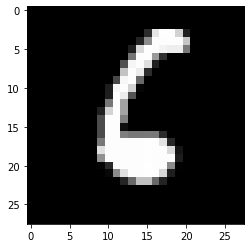

In [6]:
def plot_img(image):
    image = image.numpy()[0]
    mean = 0.1307
    std = 0.3081
    image = ((mean * image) + std)
    plt.imshow(image,cmap='gray')

sample_data = next(iter(data_loader))
plot_img(sample_data[0][1])

In [7]:
next(iter(data_loader))[0].size()

torch.Size([64, 1, 28, 28])

In [8]:
len(data_loader)

937

## Train

In [9]:
model = torch.nn.Sequential(torch.nn.Linear(784, 10, bias=True))

In [10]:
n_epochs = 15
batch_size = 100

In [11]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

In [12]:
for epoch in range(n_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        X = X.view(-1, 784)
        output = model(X)
        loss = criterion(output, Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_cost += loss / total_batch
        
    print("Epoch: {} Cost: {}".format(epoch+1, avg_cost))

Epoch: 1 Cost: 0.4776574969291687
Epoch: 2 Cost: 0.33720508217811584
Epoch: 3 Cost: 0.31410330533981323
Epoch: 4 Cost: 0.30246883630752563
Epoch: 5 Cost: 0.29457151889801025
Epoch: 6 Cost: 0.2890973389148712
Epoch: 7 Cost: 0.28484731912612915
Epoch: 8 Cost: 0.28094878792762756
Epoch: 9 Cost: 0.27804329991340637
Epoch: 10 Cost: 0.2755756974220276
Epoch: 11 Cost: 0.2736911475658417
Epoch: 12 Cost: 0.2716001272201538
Epoch: 13 Cost: 0.2696775794029236
Epoch: 14 Cost: 0.2686876952648163
Epoch: 15 Cost: 0.26717185974121094


## Test

In [13]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 784).float()
    Y_test = mnist_test.test_labels
    
    pred = model(X_test)
    correct_pred = torch.argmax(pred, 1) == Y_test
    accuracy = correct_pred.float().mean()
    print("Accuracy: {}".format(accuracy.item()))

Accuracy: 0.8834999799728394


C:\Users\user\Anaconda3\envs\nlp\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\user\Anaconda3\envs\nlp\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


## Visualization

In [14]:
import matplotlib.pyplot as plt
import random

In [15]:
r = random.randint(0, len(mnist_test)-1)
X_single_data = mnist_test.test_data[r:r+1].view(-1, 784).float()
Y_single_data = mnist_test.test_labels[r:r+1]

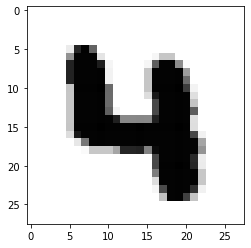

Prediction: 4
Label: 4


In [16]:
plt.imshow(mnist_test.test_data[r:r+1].view(28, 28),
           cmap="Greys", interpolation="nearest")
plt.show()

single_pred = model(X_single_data)
print("Prediction: {}".format(torch.argmax(single_pred, 1).item()))
print("Label: {}".format(Y_single_data.item()))